In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('./../data/data_normal.csv')

In [68]:
df['course_length']

0     280.0
1     280.0
2     220.0
3     200.0
4     120.0
      ...  
62    200.0
63    220.0
64     95.0
65     95.0
66    220.0
Name: course_length, Length: 67, dtype: float64

In [69]:
df_nn['course_length']

0     280.0
1     280.0
3     200.0
4     120.0
5      95.0
6     200.0
7     165.0
8     104.0
9     100.0
10     95.0
11     95.0
12     95.0
13    200.0
14    170.0
15     95.0
16    220.0
17    100.0
18     95.0
20     77.0
21    280.0
22    280.0
23    100.0
24    280.0
25     95.0
26     95.0
27     95.0
29    200.0
30    170.0
31     95.0
32    200.0
33    120.0
34     90.0
35    200.0
36     95.0
37    100.0
39    100.0
40    280.0
41    280.0
42    270.0
43     95.0
45     77.0
46    280.0
47    280.0
48     77.0
49    280.0
50    280.0
51    270.0
52     95.0
53     95.0
54    200.0
55     90.0
56     95.0
57     95.0
58     95.0
59    200.0
60     95.0
61    120.0
62    200.0
64     95.0
65     95.0
Name: course_length, dtype: float64

In [70]:
X = df.drop(['school_name', 'program_name', 'campus_location', 'state', 'reporting_start', 'reporting_end',
       'employed_infield_180days', 'employed_infield_90days', 'not_seeking_infield_90days','graduated_ontime','graduates_included',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
       'salary_70K_80K_90days', 'salary_70K_80K_180days',
       'salary_80K_90K_90days', 'salary_80K_90K_180days', 'over90K_90days',
       'over90K_180days'], axis = 1)
y = df['employed_infield_180days']

In [71]:
df_nn = df.dropna()

In [72]:
X_nn = df_nn.drop(['school_name', 'program_name', 'campus_location', 'state', 'reporting_start', 'reporting_end',
       'employed_infield_180days', 'employed_infield_90days', 'not_seeking_infield_90days','graduated_ontime','graduates_included',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
       'salary_70K_80K_90days', 'salary_70K_80K_180days',
       'salary_80K_90K_90days', 'salary_80K_90K_180days', 'over90K_90days',
       'over90K_180days'], axis = 1)
y_nn = df_nn['employed_infield_180days']

In [73]:
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=48)

In [74]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+03, tolerance: 6.025e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [75]:
y_pred = model.predict(X_test)

In [76]:
train_score_ls = model.score(X_train, y_train)
test_score_ls = model.score(X_test, y_test)

In [77]:
train_score_ls

0.4839340114250671

In [78]:
test_score_ls

0.5267590800771365

In [79]:
mean_squared_error(y_test, y_pred)

82.40044338257518

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.077468996508617

In [81]:
lasso_coeff = model.fit(X_nn, y_nn).coef_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.989e+03, tolerance: 8.294e-01
  model = cd_fast.enet_coordinate_descent(


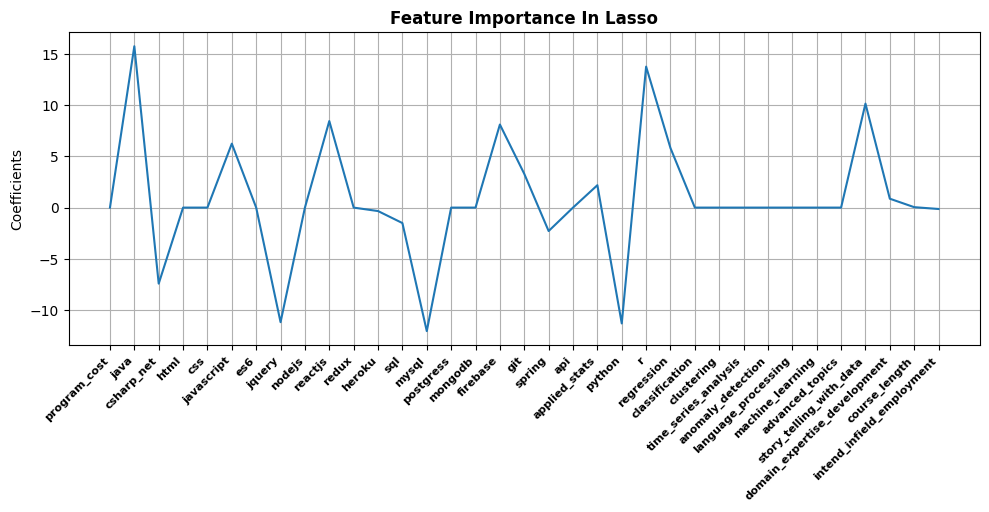

In [82]:

names = X_nn.columns
plt.figure(figsize=(10, 5))
plt.plot(range(len(names)), lasso_coeff)
plt.xticks(range(len(names)), names,  rotation=45, ha='right', fontsize=8)
plt.xticks(fontweight='bold')
plt.ylabel('Coefficients')
plt.grid(True)
plt.tight_layout()

plt.title("Feature Importance In Lasso", fontsize=12, fontweight='bold')
plt.savefig("/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso_coeffs.png",dpi=300)

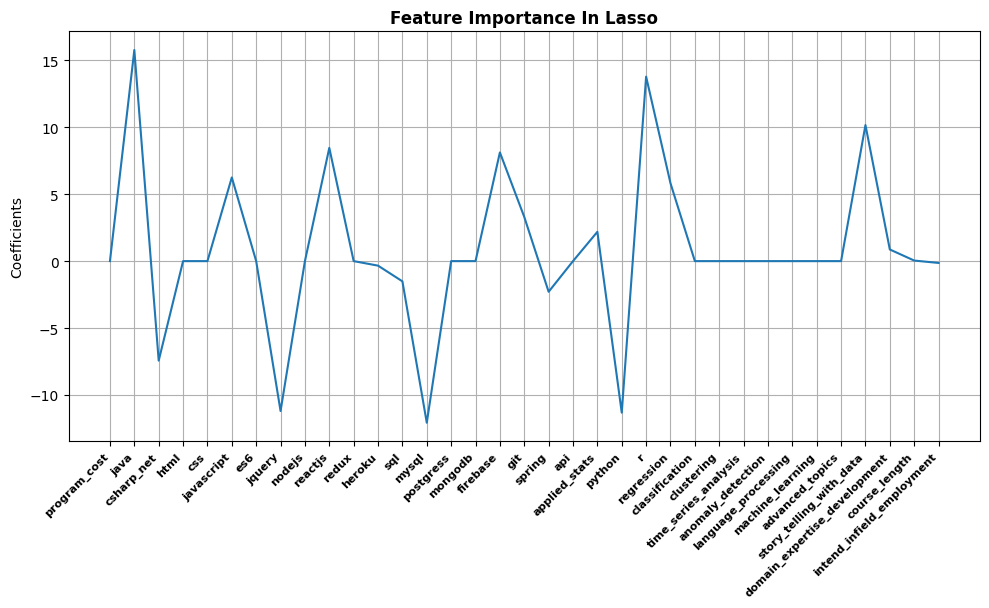

In [83]:


names = X_nn.columns

plt.figure(figsize=(10, 5))
plt.plot(range(len(names)), lasso_coeff)
plt.xticks(range(len(names)), names, rotation=45, ha='right', fontsize=8, fontweight='bold')
plt.ylabel('Coefficients')
plt.grid(True)
plt.tight_layout()

# Adjust the spacing for the title
plt.title("Feature Importance In Lasso", fontsize=12, fontweight='bold')

# Increase the bottom margin to prevent title cutoff
plt.subplots_adjust(bottom=0.15)

# Save the figure with a higher DPI for better image quality
plt.savefig("/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso_coeffs.png", dpi=300, bbox_inches='tight')
plt.show()


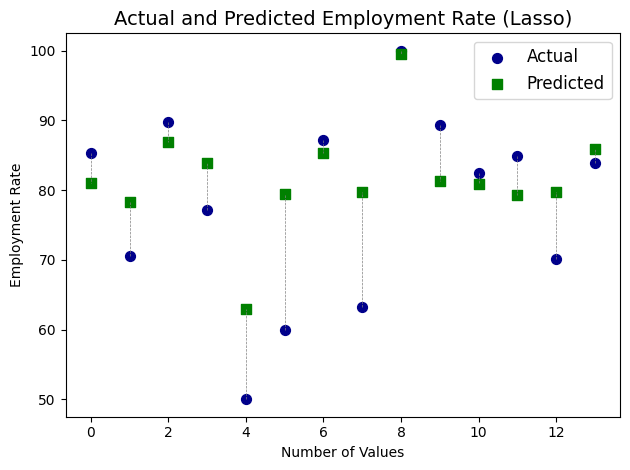

In [88]:
# Convert y_test and y_pred to arrays
y_test = np.array(y_test)
#y_pred = y_pred.values

# Calculate the differences between actual and predicted values
differences = y_test - y_pred

# Plot the actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='darkblue', label='Actual', marker='o', s=50)
plt.scatter(range(len(y_pred)), y_pred, color='green', label='Predicted', marker='s', s=50)

# Plot lines connecting the actual and predicted values
for i in range(len(y_test)):
    plt.plot([i, i], [y_test[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.5)

plt.legend(fontsize=12)
plt.title('Actual and Predicted Employment Rate (Lasso)', fontsize=14)
plt.xlabel("Number of Values")
plt.ylabel("Employment Rate")
plt.tight_layout()
plt.savefig("/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso3.png")
plt.show()


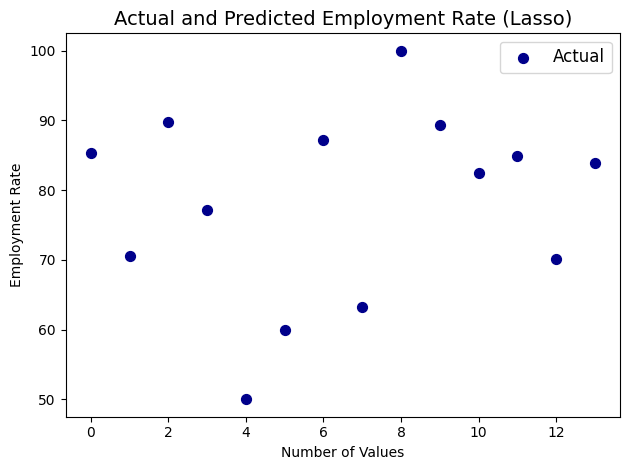

In [89]:

# Plot the actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='darkblue', label='Actual', marker='o', s=50)

plt.legend(fontsize=12)
plt.title('Actual and Predicted Employment Rate (Lasso)', fontsize=14)
plt.xlabel("Number of Values")
plt.ylabel("Employment Rate")
plt.tight_layout()
plt.savefig("/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso1.png")
plt.show()


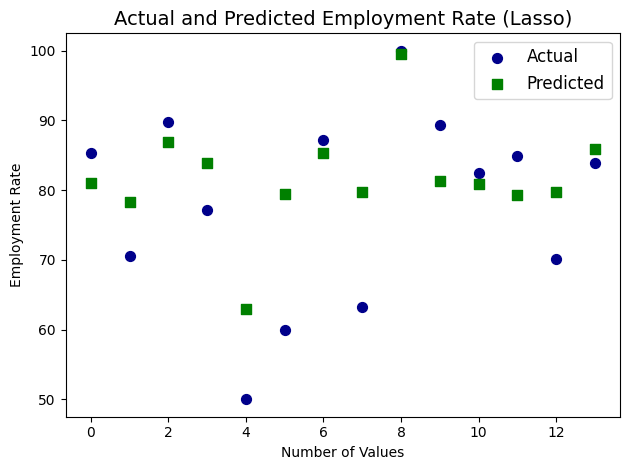

In [90]:

# Plot the actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='darkblue', label='Actual', marker='o', s=50)
plt.scatter(range(len(y_pred)), y_pred, color='green', label='Predicted', marker='s', s=50)


plt.legend(fontsize=12)
plt.title('Actual and Predicted Employment Rate (Lasso)', fontsize=14)
plt.xlabel("Number of Values")
plt.ylabel("Employment Rate")
plt.tight_layout()
plt.savefig("/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso2.png")
plt.show()


In [91]:
from PIL import Image
import glob
import imageio

# Create a list to store the images
filenames =['/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso1.png','/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso2.png','/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso3.png']
images = []

# Load the images
for filename in filenames:
    img = Image.open(filename)
    images.append(img)


# Save the images as a GIF
imageio.mimsave('/Users/anastasiyaayala/Desktop/bootcamps_edu/images/lasso.gif', images, duration=1)

